#### Name: Kefan Zheng  
#### StudentId: 9086175008  
#### Email: kzheng58@wisc.edu

# Problem 1-1

In [1]:
using Pkg
Pkg.add("JuMP")
Pkg.add("HiGHS")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


In [2]:
using JuMP
using HiGHS
using Plots

# define model
model = Model(HiGHS.Optimizer)

# define decision variables
@variable(model, x1 >= 0)
@variable(model, x2 >= 0)

# define objective function
@objective(model, Max, -4x1 + 2x2)

# define constraints
@constraint(model, x2 <= 5)
@constraint(model, 2x1 - x2 >= 2)

print(model)

In [3]:
# solve
optimize!(model)

# result
println("Optimal solution:")
println("x1 = ", value(x1))
println("x2 = ", value(x2))
println("Optimal objective value = ", objective_value(model))

Running HiGHS 1.6.0: Copyright (c) 2023 HiGHS under MIT licence terms
Presolving model
0 rows, 0 cols, 0 nonzeros
0 rows, 0 cols, 0 nonzeros
Presolve : Reductions: rows 0(-2); columns 0(-2); elements 0(-3) - Reduced to empty
Solving the original LP from the solution after postsolve
Model   status      : Optimal
Objective value     : -4.0000000000e+00
HiGHS run time      :          0.00
Optimal solution:
x1 = 1.0
x2 = 0.0
Optimal objective value = -4.0


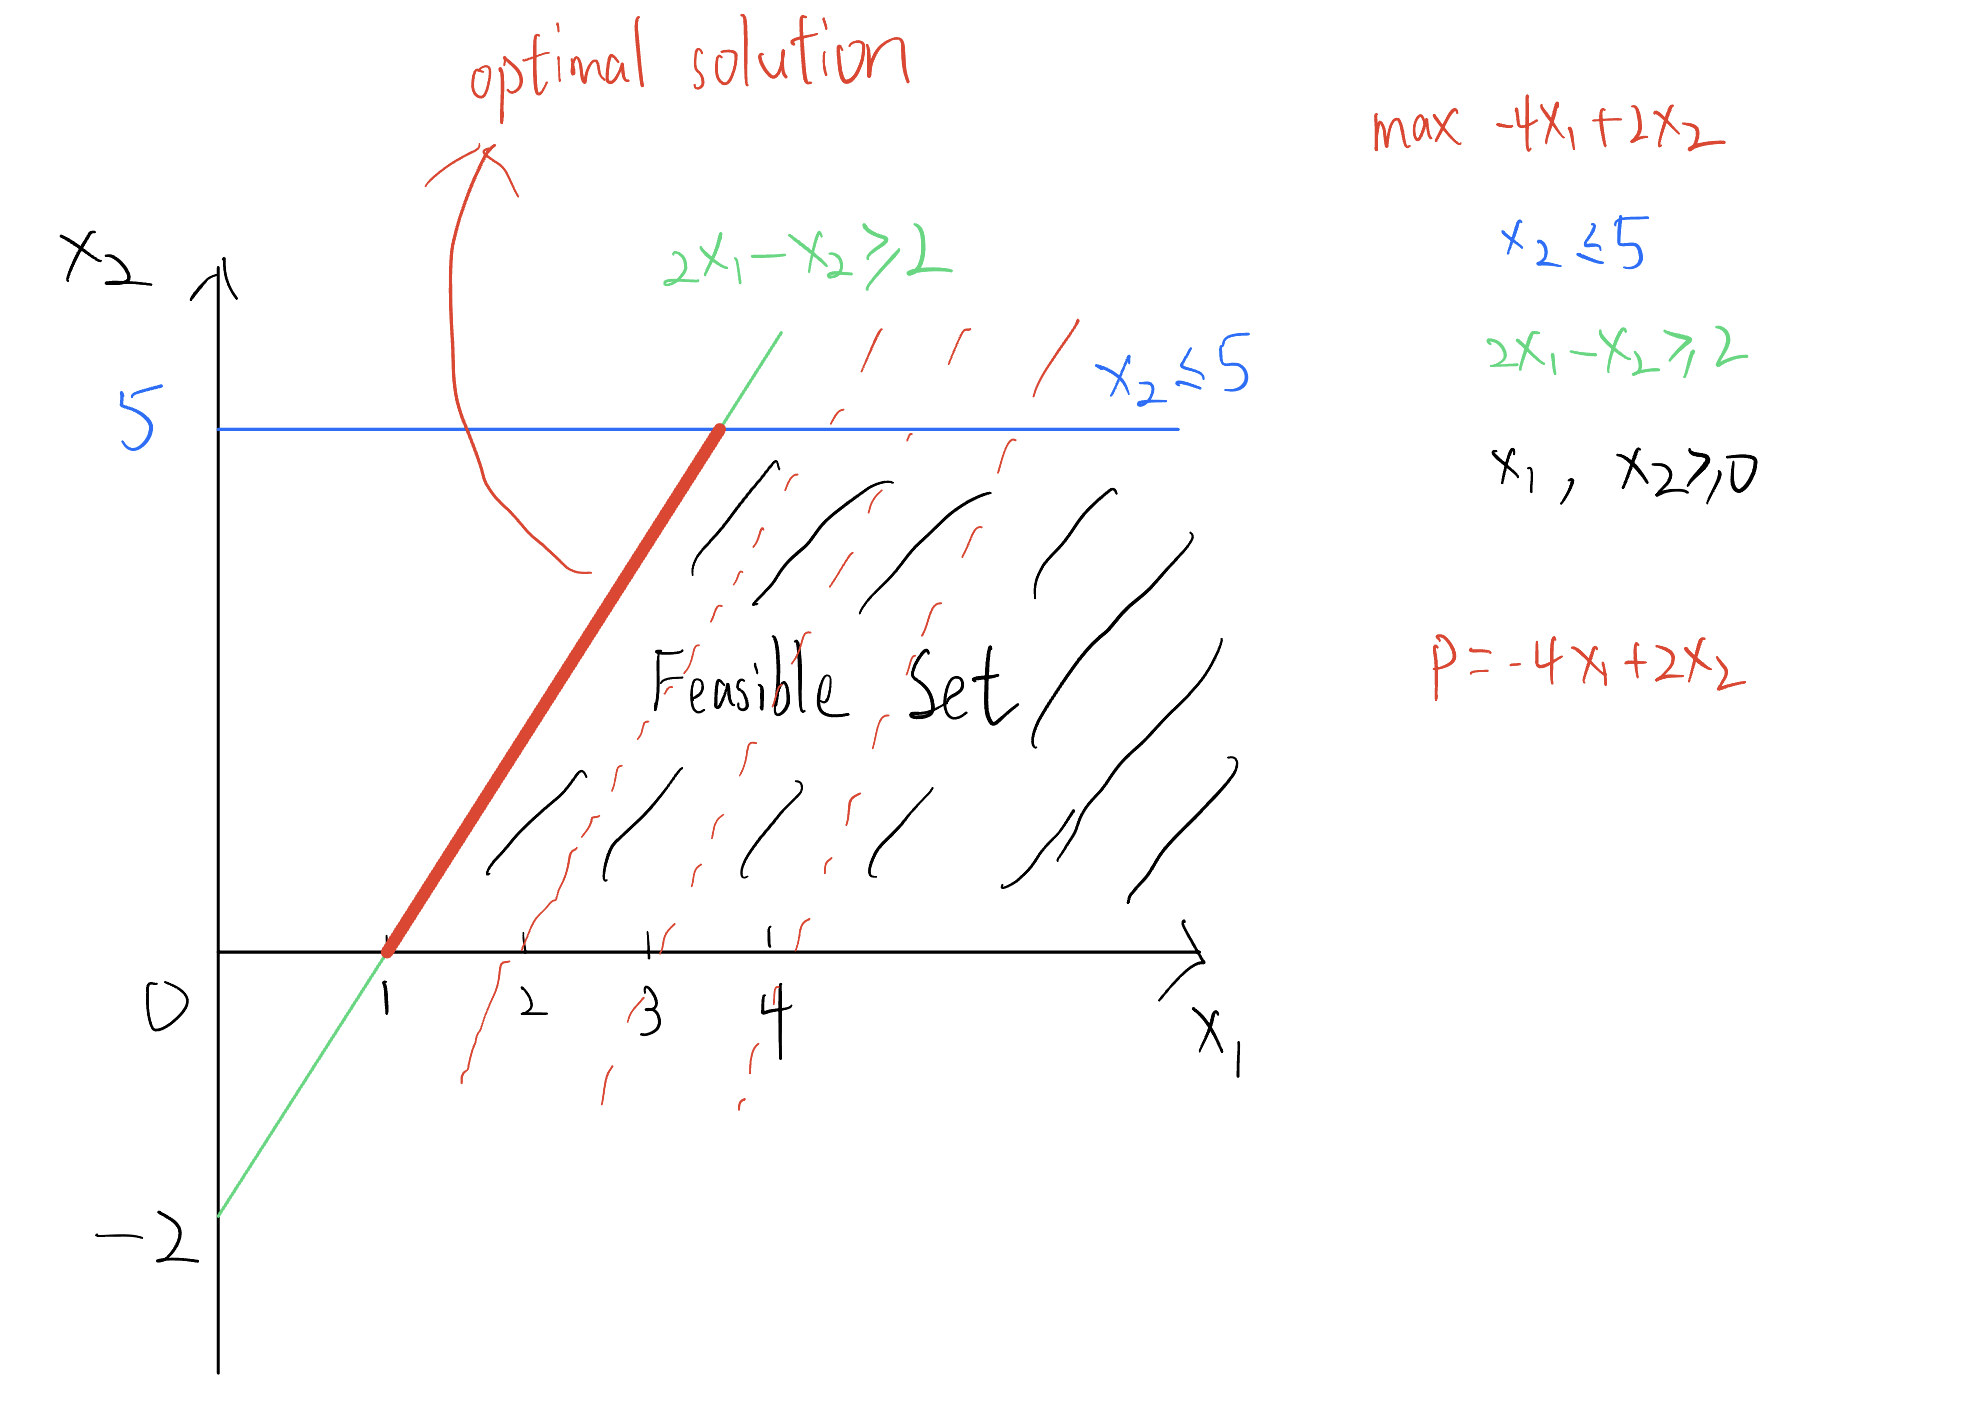

Answer:  
The feasible region is shown in the plot. It has infinitely many optimal solutions. $(x_1=1, x_2=0)$ is one of the optimal solutions and its optimal value is $-4x_1+2x_2=-4$.

# Problem 1-2

Answer:  
It has infinitely many solutions. Besides the optimal solution in problem 1-1, $(x_1=3.5, x_2=5)$ is another optimal solution and its optimal value is also $-4x_1+2x_2=-4$.

# Problem 1-3

In [4]:
# modify objective function
@objective(model, Max, -x1 + x2)

# solve
optimize!(model)

println("Optimal solution:")
println("x1 = ", value(x1))
println("x2 = ", value(x2))
println("Optimal objective value = ", objective_value(model))

Solving LP without presolve or with basis
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0    -4.9999748642e-01 Ph1: 1(1); Du: 1(0.499997) 0s
          1     1.5000000000e+00 Pr: 0(0) 0s
Model   status      : Optimal
Simplex   iterations: 1
Objective value     :  1.5000000000e+00
HiGHS run time      :          0.00
Optimal solution:
x1 = 3.5
x2 = 5.0
Optimal objective value = 1.5


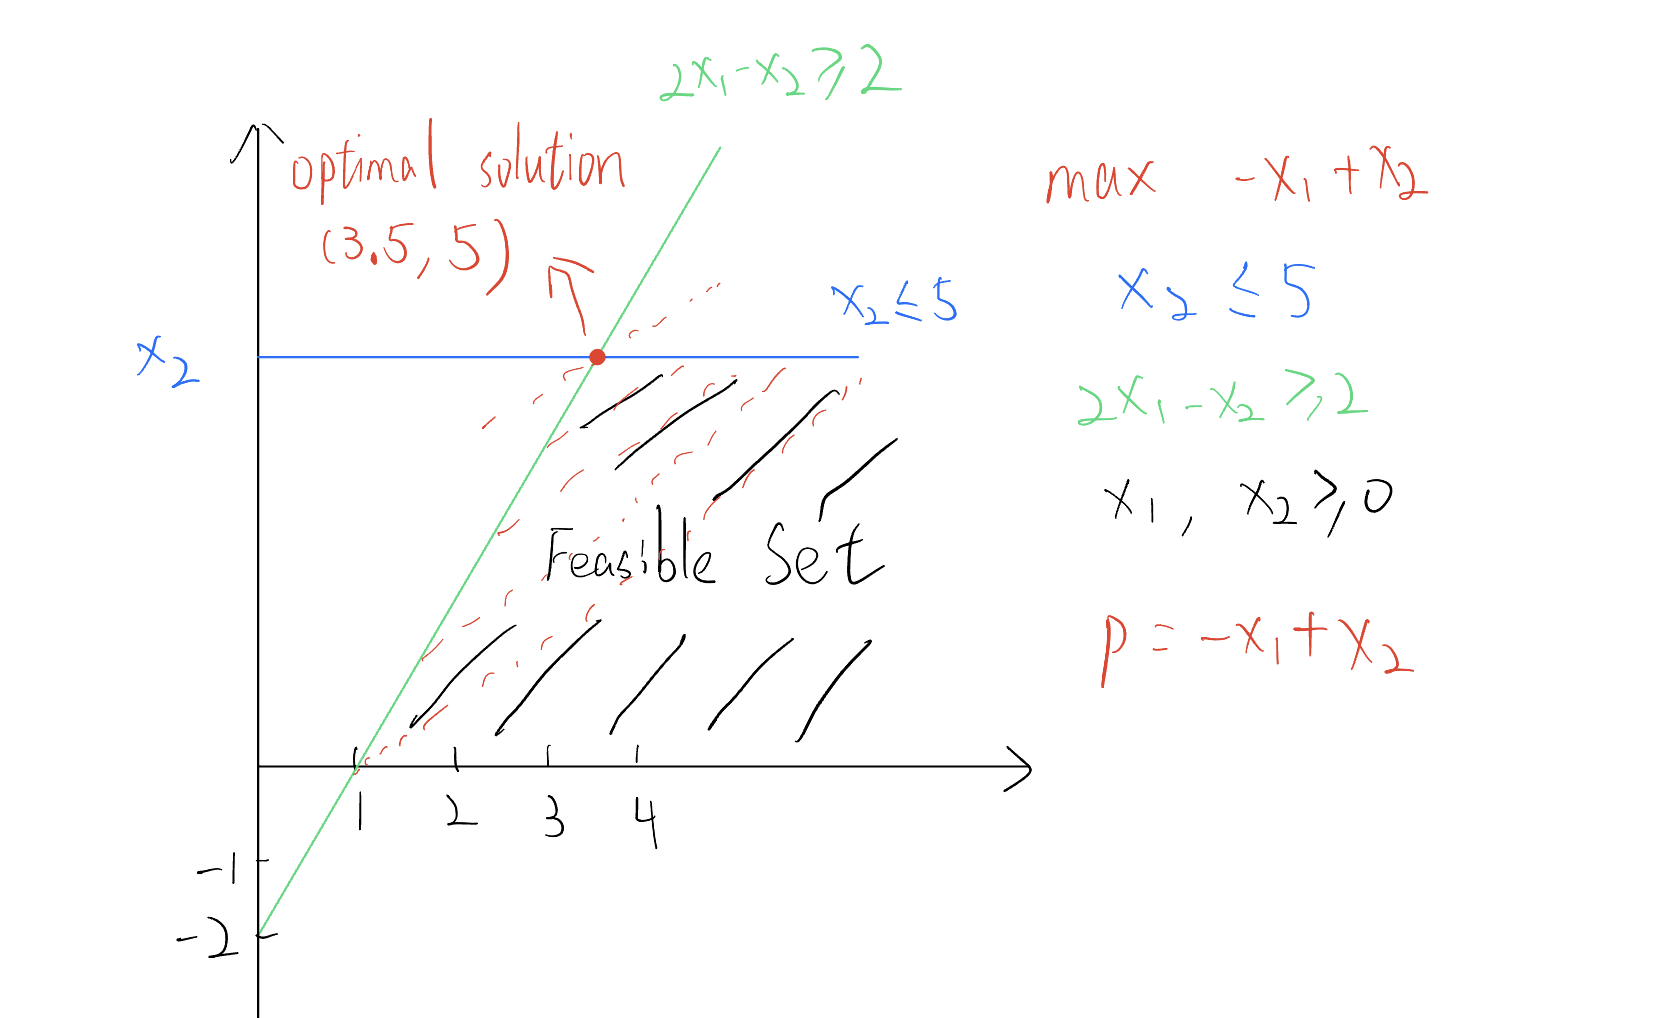

Answer:  
There is only one optimal solution. It is $(x_1=3.5, x_2=5)$, the optimal value is $(-x_1+x_2=1.5)$

# Problem 1-4

Answer:  
If the objective is changed to minimize $-x_1+x_2$, the LP doesn't have an optimal solution. It's a unbounded problem.
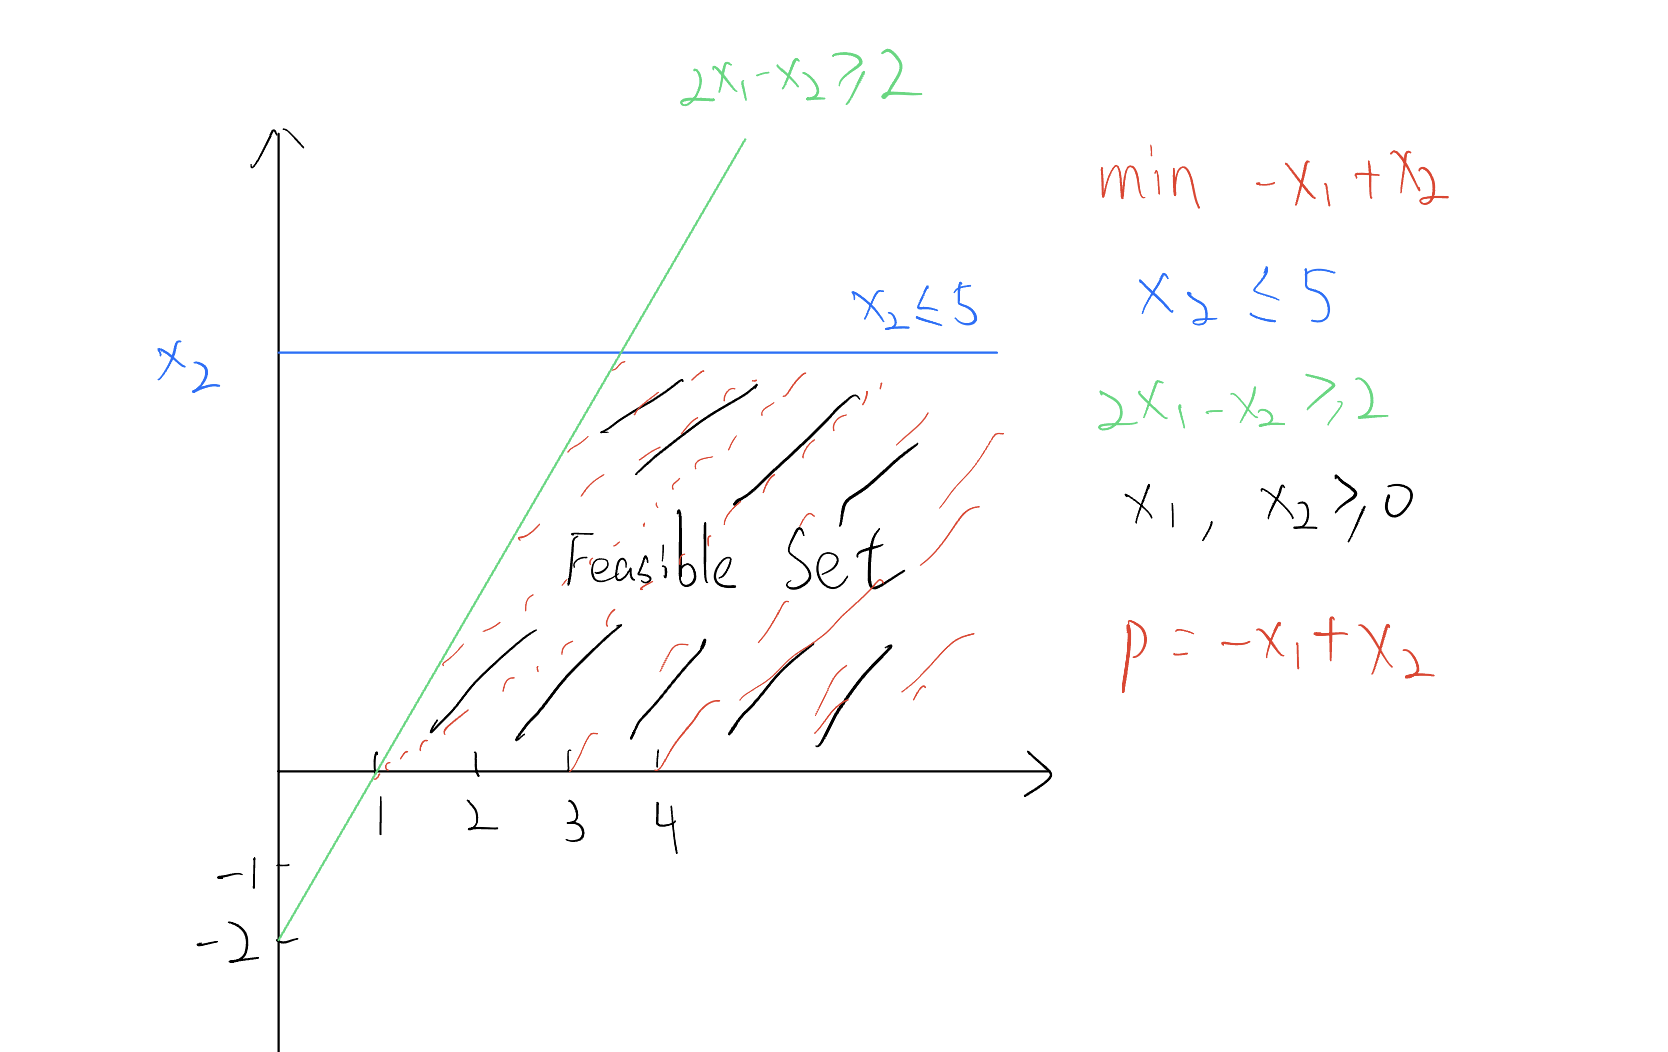

# Problem 2-1

In [5]:
# define model
model = Model(HiGHS.Optimizer)

# define decision variables
@variable(model, x1 >= 0)
@variable(model, x2)
@variable(model, x3)
@variable(model, x4 >= 0)

# define objective function
@objective(model, Min, 2x1 - x2 + 3x3 - 2x4)

# define constraints
@constraint(model, 3x2 - x3 + 4x4 >= 10)
@constraint(model, 4x1 - 7x2 + x3 - x4 == 5)
@constraint(model, x1 - 3x3 + 8x4 <= 3)

print(model)

In [6]:
optimize!(model)

# results
println("Optimal solution:")
println("x1 = ", value(x1))
println("x2 = ", value(x2))
println("x3 = ", value(x3))
println("x4 = ", value(x4))
println("Optimal objective value = ", objective_value(model))

Running HiGHS 1.6.0: Copyright (c) 2023 HiGHS under MIT licence terms
Presolving model
3 rows, 4 cols, 10 nonzeros
3 rows, 4 cols, 10 nonzeros
Presolve : Reductions: rows 3(-0); columns 4(-0); elements 10(-0) - Not reduced
Problem not reduced by presolve: solving the LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0    -1.7504999983e+03 Ph1: 3(5002.25); Du: 3(2.25) 0s
          3     1.5937500000e+01 Pr: 0(0) 0s
Model   status      : Optimal
Simplex   iterations: 3
Objective value     :  1.5937500000e+01
HiGHS run time      :          0.00
Optimal solution:
x1 = 7.593750000000002
x2 = 3.843750000000001
x3 = 1.5312500000000007
x4 = 0.0
Optimal objective value = 15.937500000000005


Answer:  
Optimal solution:
$$
x1 = 7.593750000000002, 
x2 = 3.843750000000001,  
x3 = 1.5312500000000007,  
x4 = 0.0
$$
Optimal objective value:
$$
15.937500000000005
$$

# Problem 2-2

## Converting to Standard Form

When we convert it, the model should look like this:
\begin{align}
\underset{x}{\max} \ & c^Tx & \\
\text{s.t.} \ & Ax \leq b &\\
& x \geq 0 &
\end{align}
 

* Bound $x_2$ by replacing it with $x_2 = a - b, \ a, b \geq 0$, and bound $x_3$ by replacing it with $x_3 = u - v, \ u, v \geq 0$:


\begin{align}
\underset{x_1,a,b,u,v,x_4}{\min} \ & 2x_1 - (a-b) + 3(u-v) - 2x_4 & \\
\text{s.t.} \ & 4x_1 - 7(a-b) + (u-v) - x_4 = 5 &\\
& 3(a-b) - (u-v) + 4x_4 \geq 10 &\\
& x_1 - 3(u-v) + 8x_4 \leq 3 &\\
& x_1, a, b, u, v, x_4 \geq 0&
\end{align}

* Rearrange:

\begin{align}
\underset{x_1,a,b,u,v,x_4}{\min} \ & 2x_1 - a + b + 3u - 3v - 2x_4 & \\
\text{s.t.} \ & 4x_1 - 7a + 7b + u - v - x_4 = 5 &\\
& 3a - 3b - u + v + 4x_4 \geq 10 &\\
& x_1 - 3u + 3v + 8x_4 \leq 3 &\\
& x_1, a, b, u, v, x_4 \geq 0&
\end{align}

* Turn the min into a max:

\begin{align}
\underset{x_1,a,b,u,v,x_4}{-\max} \ & -2x_1 + a - b - 3u + 3v + 2x_4 & \\
\text{s.t.} \ & 4x_1 - 7a + 7b + u - v - x_4 = 5 &\\
& 3a - 3b - u + v + 4x_4 \geq 10 &\\
& x_1 - 3u + 3v + 8x_4 \leq 3 &\\
& x_1, a, b, u, v, x_4 \geq 0&
\end{align}

* Flip $\geq$ inequality and replace equality with two inequalities:

\begin{align}
\underset{x_1,a,b,u,v,x_4}{-\max} \ & -2x_1 + a - b - 3u + 3v + 2x_4 & \\
\text{s.t.} \ & 4x_1 - 7a + 7b + u - v - x_4 \geq 5 &\\
& 4x_1 - 7a + 7b + u - v - x_4 \leq 5 &\\
& -3a + 3b + u - v - 4x_4 \leq -10 &\\
& x_1 - 3u + 3v + 8x_4 \leq 3 &\\
& x_1, a, b, u, v, x_4 \geq 0&
\end{align}


* Finally, flip the newly created $\geq$ inequality and we're done!

\begin{align}
\underset{x_1,a,b,u,v,x_4}{-\max} \ & -2x_1 + a - b - 3u + 3v + 2x_4 & \\
\text{s.t.} \ & -4x_1 + 7a - 7b - u + v + x_4 \leq -5 &\\
& 4x_1 - 7a + 7b + u - v - x_4 \leq 5 &\\
& -3a + 3b + u - v - 4x_4 \leq -10 &\\
& x_1 - 3u + 3v + 8x_4 \leq 3 &\\
& x_1, a, b, u, v, x_4 \geq 0&
\end{align}


Verify correctness by solving the new model in Julia:

In [7]:
# define model
model = Model(HiGHS.Optimizer)

# define decision variables
@variable(model, x1 >= 0)
@variable(model, a >= 0)
@variable(model, b >= 0)
@variable(model, u >= 0)
@variable(model, v >= 0)
@variable(model, x4 >= 0)

# define objective function
@objective(model, Max, -2x1 + a - b - 3u + 3v + 2x4)

# define constraints
@constraint(model, -3a + 3b + u - v - 4x4 <= -10)
@constraint(model, -4x1 + 7a - 7b - u + v + x4 <= -5)
@constraint(model, 4x1 - 7a + 7b + u - v - x4 <= 5)
@constraint(model, x1 - 3u + 3v + 8x4 <= 3)

# optimize
optimize!(model)

# print
println("Optimal solution:")
println("x1 = ", value(x1))
println("x2 = ", value(a-b))
println("x3 = ", value(u-v))
println("x4 = ", value(x4))
println("Optimal objective value = ", -objective_value(model))

Running HiGHS 1.6.0: Copyright (c) 2023 HiGHS under MIT licence terms
Presolving model
4 rows, 6 cols, 21 nonzeros
3 rows, 4 cols, 10 nonzeros
3 rows, 4 cols, 10 nonzeros
Presolve : Reductions: rows 3(-1); columns 4(-2); elements 10(-11)
Solving the presolved LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0    -1.7504999984e+03 Ph1: 3(5002.25); Du: 3(2.25) 0s
          3     1.5937500000e+01 Pr: 0(0) 0s
Solving the original LP from the solution after postsolve
Model   status      : Optimal
Simplex   iterations: 3
Objective value     : -1.5937500000e+01
HiGHS run time      :          0.00
Optimal solution:
x1 = 7.593750000000002
x2 = 3.84375
x3 = 1.5312500000000007
x4 = 0.0
Optimal objective value = 15.937500000000005


Verified correct! So 
$$
A=
\begin{bmatrix}
-4 & 7 & -7 & -1 & 1 & 1 \\
4 & -7 & 7 & 1 & -1 & -1 \\
0 & -3 & 3 & 1 & -1 & -4 \\
1 & 0 & 0 & -3 & 3 & 8
\end{bmatrix}
$$

$$
b=
\begin{bmatrix}
-5 \\
5 \\
-10 \\
3
\end{bmatrix}
$$

$$
c=
\begin{bmatrix}
-2 \\
1 \\
-1 \\
-3 \\
3 \\
2
\end{bmatrix}
$$

$$
x=
\begin{bmatrix}
x_1 \\
a \\
b \\
u \\
v \\
x_4
\end{bmatrix}
$$

# Problem 2-3

In [8]:
# define model
model = Model(HiGHS.Optimizer)

# define decision variables
@variable(model, x1 >= 0)
@variable(model, a >= 0)
@variable(model, b >= 0)
@variable(model, u >= 0)
@variable(model, v >= 0)
@variable(model, x4 >= 0)

# define objective function
@objective(model, Max, -2x1 + a - b - 3u + 3v + 2x4)

# define constraints
@constraint(model, -3a + 3b + u - v - 4x4 <= -10)
@constraint(model, -4x1 + 7a - 7b - u + v + x4 <= -5)
@constraint(model, 4x1 - 7a + 7b + u - v - x4 <= 5)
@constraint(model, x1 - 3u + 3v + 8x4 <= 3)

# optimize
optimize!(model)

# display results
println("Optimal solution:")
println("x1 = ", value(x1))
println("x2 = ", value(a-b), " (a = ", value(a), " b = ", value(b), ")")
println("x3 = ", value(u-v), " (u = ", value(u), " v = ", value(v), ")")
println("x4 = ", value(x4))
println("Optimal objective value = ", -objective_value(model))

Running HiGHS 1.6.0: Copyright (c) 2023 HiGHS under MIT licence terms
Presolving model
4 rows, 6 cols, 21 nonzeros
3 rows, 4 cols, 10 nonzeros
3 rows, 4 cols, 10 nonzeros
Presolve : Reductions: rows 3(-1); columns 4(-2); elements 10(-11)
Solving the presolved LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0    -1.7504999984e+03 Ph1: 3(5002.25); Du: 3(2.25) 0s
          3     1.5937500000e+01 Pr: 0(0) 0s
Solving the original LP from the solution after postsolve
Model   status      : Optimal
Simplex   iterations: 3
Objective value     : -1.5937500000e+01
HiGHS run time      :          0.00
Optimal solution:
x1 = 7.593750000000002
x2 = 3.84375 (a = 3.84375 b = 0.0)
x3 = 1.5312500000000007 (u = 1.5312500000000007 v = 0.0)
x4 = 0.0
Optimal objective value = 15.937500000000005


# Problem 3-1

\begin{align}
\underset{x_1, x_2, x_3, x_4, x_5, x_6, x_7, x_8, x_9}{\max} \ & 8x_1 + 14x_2 + 11x_3 + 4x_4 + 12x_5 + 7x_6 + 4x_7 + 13x_8 + 9x_9 & \\
\text{s.t.} \ & x_1 + x_2 + x_3 \leq 480 &\\
& x_4 + x_5 + x_6 \leq 400 &\\
& x_7 + x_8 + x_9 \leq 230 &\\
& x_2 + x_5 + x_8 \leq 420 &\\
& x_3 + x_6 + x_9 \leq 250 &\\
& x_1, x_2, x_3, x_4, x_5, x_6, x_7, x_8, x_9 \geq 0 &
\end{align}

# Problem 3-2

In [9]:
# define model
model = Model(HiGHS.Optimizer)

# define decision variables
@variable(model, x1 >= 0)
@variable(model, x2 >= 0)
@variable(model, x3 >= 0)
@variable(model, x4 >= 0)
@variable(model, x5 >= 0)
@variable(model, x6 >= 0)
@variable(model, x7 >= 0)
@variable(model, x8 >= 0)
@variable(model, x9 >= 0)

# define objective function
@objective(model, Max, 8x1 + 14x2 + 11x3 + 4x4 + 12x5 + 7x6 + 4x7 + 13x8 + 9x9)

# define constraints
@constraint(model, x1 + x2 + x3 <= 480)
@constraint(model, x4 + x5 + x6 <= 400)
@constraint(model, x7 + x8 + x9 <= 230)
@constraint(model, x2 + x5 + x8 <= 420)
@constraint(model, x3 + x6 + x9 <= 250)

# optimize
optimize!(model)

# display results
println("Optimal solution:")
println("x1 = ", value(x1))
println("x2 = ", value(x2))
println("x3 = ", value(x3))
println("x4 = ", value(x4))
println("x5 = ", value(x5))
println("x6 = ", value(x6))
println("x7 = ", value(x7))
println("x8 = ", value(x8))
println("x9 = ", value(x9))
println("Optimal objective value = ", objective_value(model))

Running HiGHS 1.6.0: Copyright (c) 2023 HiGHS under MIT licence terms
Presolving model
5 rows, 9 cols, 15 nonzeros
5 rows, 9 cols, 15 nonzeros
Presolve : Reductions: rows 5(-0); columns 9(-0); elements 15(-0) - Not reduced
Problem not reduced by presolve: solving the LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0    -8.1999930746e+01 Ph1: 5(15); Du: 9(81.9999) 0s
         10     1.0910000000e+04 Pr: 0(0) 0s
Model   status      : Optimal
Simplex   iterations: 10
Objective value     :  1.0910000000e+04
HiGHS run time      :          0.00
Optimal solution:
x1 = 440.0
x2 = 0.0
x3 = 40.0
x4 = 0.0
x5 = 400.0
x6 = 0.0
x7 = 0.0
x8 = 20.0
x9 = 210.0
Optimal objective value = 10910.0


Answer:  
Produce 480 hams, 440 of which are sold fresh, 40 of which are smoked on overtime. 
Produce 400 pork bellies, all of which are smoked during normal working time. 
Produce 230 picnic hams, 20 of which are smoked during normal working time, and the remaining 210 are all smoked on overtime. 
Such a production strategy can maximize daily profits to 10910$.

# Problem 4-1

\begin{align}
\underset{x_{pc}}{\max} \ & \sum_{p \in P} \sum_{c \in C} x_{pc}(h_{pc} - q_c) & \\
\text{s.t.} \ & \forall p \in P: \sum_{c \in C} x_{pc} \leq b_p &\\
& \forall c \in C: \sum_{p \in P} x_{pc} \leq u_c & \\
& \forall p \in P, \forall c \in C: x_{pc} \geq 0 &
\end{align}

# Problem 4-2

In [10]:
using Pkg
Pkg.add("DataFrames")
Pkg.add("CSV")
Pkg.add("NamedArrays")
Pkg.add("OrderedCollections")

using DataFrames, CSV, NamedArrays
using OrderedCollections
df = CSV.read("pork-general.csv", DataFrame, delim=',')

cook_type = propertynames(df)[3:end]
product = convert(Array, df[3:end,1])

max_daily_product = OrderedDict(zip(product,df[3:end,2])) # bp
b = hcat(collect(values(max_daily_product))...)
max_daily_cook = OrderedDict(zip(cook_type,df[1,3:end])) # uc
u = hcat(collect(values(max_daily_cook))...)
proc_cost = OrderedDict(zip(cook_type,df[2,3:end])) # qc
q = hcat(collect(values(proc_cost))...)

h = Matrix(df[3:end,3:end])
h_NA = NamedArray(h, (product, cook_type), ("Product", "Cook Type"));

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


In [11]:
println(df)
println(cook_type)
println(product)
println(max_daily_product)
println(b)
println(max_daily_cook)
println(u)
println(proc_cost)
println(q)
println(h_NA)

7×7 DataFrame
 Row │ Column1                   Max Daily Product (b)  Fresh  SmokedRegular  SmokedOvertime  Cured  Pickled 
     │ String31                  Union{Missing, Int64}  Int64  Int64          Int64           Int64  Int64   
─────┼───────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ Max Daily Processing (u)                missing   5000            420             250    100      400
   2 │ Proc. Cost (q)                          missing      0              3               5      4        2
   3 │ Ham                                         480      8             14              11     15        7
   4 │ PorkBelly                                   400      4             12               7      9        8
   5 │ Picnic                                      230      4             13               9     10       10
   6 │ Bacon                                       500      5             13               6     10        2
  

In [12]:
# define model
model = Model(HiGHS.Optimizer)

# define decision variables
@variable(model, x[1:5, 1:5] >= 0)

# # define objective function
@objective(model, Max, sum(x .* (h .- q)))

# define constraints
@constraint(model, sum(x, dims=2) .<= b')
@constraint(model, sum(x, dims=1) .<= u)

# optimize
optimize!(model)

# print
println("Optimal solution:")
println("x = ", value.(x))
for i in 1:length(product)
    for j in 1:length(cook_type)
        println("Product: ", product[i], ", Cook Type: ", cook_type[j], ", Produce Amount: ", value(x[(i-1) * length(product) + j]))
    end
end
println("Optimal objective value = ", objective_value(model))

Running HiGHS 1.6.0: Copyright (c) 2023 HiGHS under MIT licence terms
Presolving model
8 rows, 17 cols, 28 nonzeros
7 rows, 15 cols, 25 nonzeros
Presolve : Reductions: rows 7(-3); columns 15(-10); elements 25(-25)
Solving the presolved LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0    -1.0299901578e+02 Ph1: 7(24); Du: 14(102.999) 0s
          8    -1.4725000000e+04 Pr: 0(0) 0s
Solving the original LP from the solution after postsolve
Model   status      : Optimal
Simplex   iterations: 8
Objective value     :  1.4725000000e+04
HiGHS run time      :          0.00
Optimal solution:
x = [380.0 0.0 0.0 100.0 0.0; 0.0 230.0 0.0 0.0 170.0; 0.0 0.0 0.0 0.0 230.0; 310.0 190.0 0.0 0.0 0.0; 0.0 0.0 245.0 0.0 0.0]
Product: Ham, Cook Type: Fresh, Produce Amount: 380.0
Product: Ham, Cook Type: SmokedRegular, Produce Amount: 0.0
Product: Ham, Cook Type: SmokedOvertime, Produce Amount: 0.0
Product: Ham, Cook Type: Cured, Produce Amount: 

# Problem 5-1

\begin{align}
\underset{x_{i}}{\min} \ & \sum_{i \in I} x_{i}*c_{i} & \\
\text{s.t.} \ & \sum_{i \in I} x_{i} \geq K & \\
& \forall e \in E: \sum_{i \in I} x_{i}*\alpha_{ei} \geq \beta_{e} * \sum_{i \in I} x_{i} & \\
& \forall i \in I: 0 \leq x_{i} \leq u_{i} &
\end{align}

# Problem 5-2

In [13]:
# using Pkg
# Pkg.add("GLPK")
# using GLPK

# # Define the data structures
# I = # Set of mine locations
# E = # Set of elements
# u = # Dictionary mapping each location i ∈ I to the available tons of ore u_i
# c = # Dictionary mapping each location i ∈ I to the cost per ton c_i
# α = # Dictionary mapping each (element, location) pair (e, i) to the percentage α_{ei}
# β = # Dictionary mapping each element e ∈ E to the required minimum percentage β_e
# K = # Minimum total tons of ore to be mined

# # Create a new model
# model = Model(GLPK.Optimizer)

# # Decision variables
# @variable(model, x[i in I] >= 0) # Tons of ore to mine from each location

# # Objective: Minimize total cost
# @objective(model, Min, sum(c[i] * x[i] for i in I))

# # Constraint: Mine at least K tons of ore in total
# @constraint(model, sum(x[i] for i in I) >= K)

# # Constraints: Ensure the percentage of each element
# for e in E
#     @constraint(model, sum(α[(e, i)] * x[i] for i in I) / sum(x[i] for i in I) >= β[e])
# end

# # Solve the model
# optimize!(model)

# # Check results
# if termination_status(model) == MOI.OPTIMAL
#     println("Optimal solution found")
#     for i in I
#         println("Mine ", i, " - Tons of ore: ", value(x[i]))
#     end
# else
#     println("No optimal solution found")
# end

Answer:   
From the point of mathematical model, GPT's answer is correct because the constraints and objective are the same as mine.  
From the point of Julia implementation, the constraint that ensures the percentage of each element is nonlinear while GLPK solver is linear, I think we need to make the nonlinear into linear by multiplying both sides of the inequality by sum(x[i] for i in I).  

And GPT's implementation does have some differences from my implementation in problem 5-3:
1. Because AI does not know the actual data, there are differences in the definition of data structures. The variables in my implementation are all matrices, while the variables in GPT's implementation are dictionaries. In addition, for the variable $\alpha$, in my implementation, the first dimension of alpha is ***location***, and the second dimension is ***element***. While in GPT's implementation the first dimension of $\alpha$ is ***element***, and the second dimension is ***location***.
2. I used ***HiGHS*** solver while GPT used ***GLPK*** solver.
3. I used ***matrix*** and ***element-wise operators*** instead of repeated for-loop operations.


# Problem 5-3

In [14]:
#You might need to run "Pkg.add(...)" before using these packages
using DataFrames, CSV, NamedArrays
using OrderedCollections

#Load the CSV data file (should be in same directory as notebook)
df = CSV.read("optimine.csv",DataFrame,delim=',');

# create a list of mines
mines = convert(Array,df[2:end,1])

# create a list of elements
# here we take from the DataFrame header (into Julia Symbol)
elements = propertynames(df)[2:6]

# create a dictionary of the total cost of mining at each location
c = OrderedDict(zip(mines,df[2:end,7]))
c = hcat(collect(values(c))...)

# create a dictionary of the max tons available at each location
u = OrderedDict(zip(mines,df[2:end,8]))
u = hcat(collect(values(u))...)

# create a dictionary of the amount required of each element
β = OrderedDict(zip(elements,df[1,2:6]))
β = hcat(collect(values(β))...)

# create a matrix of the % of each element at each loation
mine_element_matrix = Matrix(df[2:end,2:6])

# rows are mines, columns are elements
α = NamedArray(mine_element_matrix, (mines, elements), ("mines", "elements"))
α = mine_element_matrix

K = 3000;

In [15]:
println(df)
println(mines)
println(elements)
println(c)
println(α)
println(β)
println(u)

11×8 DataFrame
 Row │ Mine            Cu     Su     C      Ar     Au     Cost per ton  Max tons available 
     │ String15        Int64  Int64  Int64  Int64  Int64  Int64?        Int64?             
─────┼─────────────────────────────────────────────────────────────────────────────────────
   1 │ Min % Required     11     12     13     10      9       missing             missing 
   2 │ 1                  10      8      8     13     10            20                 500
   3 │ 2                  17     11     15     13     10            20                 628
   4 │ 3                   8     11     13      8      8            29                 678
   5 │ 4                  15     15     11     12     10            21                 547
   6 │ 5                  11     11     10     10      7            27                 704
   7 │ 6                  16      8      8     10      5            23                 555
   8 │ 7                  12     10      8     14      7            19 

In [16]:
# define model
model = Model(HiGHS.Optimizer)

# define decision variables
n = 10
@variable(model, x[1:1, 1:n] >= 0)

# define objective function
@objective(model, Min, sum(x .* c))

# define constraints
@constraint(model, x .<= u)
@constraint(model, sum(x' .* α, dims=1) .>= β * sum(x))
@constraint(model, sum(x) >= K)

# optimize
optimize!(model)

# print
println("Optimal solution:")
println("x = ", value.(x))
for i in 1:length(x)
    println("Mine Location: ", i, ", Tons of ore need to be mined: ", value(x[i]))
end
println("Optimal objective value = ", objective_value(model))

Running HiGHS 1.6.0: Copyright (c) 2023 HiGHS under MIT licence terms
Presolving model
6 rows, 10 cols, 56 nonzeros
6 rows, 10 cols, 56 nonzeros
Presolve : Reductions: rows 6(-10); columns 10(-0); elements 56(-10)
Solving the presolved LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0     0.0000000000e+00 Pr: 1(6000) 0s
          6     6.2556333333e+04 Pr: 0(0) 0s
Solving the original LP from the solution after postsolve
Model   status      : Optimal
Simplex   iterations: 6
Objective value     :  6.2556333333e+04
HiGHS run time      :          0.00
Optimal solution:
x = [254.66666666666666 628.0 117.0 547.0 0.0 0.0 0.0 737.0 111.0 605.3333333333334]
Mine Location: 1, Tons of ore need to be mined: 254.66666666666666
Mine Location: 2, Tons of ore need to be mined: 628.0
Mine Location: 3, Tons of ore need to be mined: 117.0
Mine Location: 4, Tons of ore need to be mined: 547.0
Mine Location: 5, Tons of ore need to be mined: 0.0